## Load Dataset from Pickle File


In [2]:
import pickle
import numpy as np


with open('./Model/Dataset Skripsi - Fix Dataset (Final) - Clean - 80 - Train - TFIDF.pkl', 'rb') as f:
    df_train_80 = pickle.load(f)

with open('./Model/Dataset Skripsi - Fix Dataset (Final) - Clean - 80 - Test - TFIDF.pkl', 'rb') as f:
    df_test_80 = pickle.load(f)


In [3]:
df_train_80.tail()

,text,label,category_id,text_clean,tfidf
814,thanks bos barang sudah diterima,Layanan Pelanggan,1,thanks bos barang terima,"[0.2943284242046241, 0.3696543358982795, 0.0, ..."
815,Favorite. matur nuwun,Produk,0,favorite matur nuwun,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
816,Barang bagus dan one day service bisa,Produk,0,barang bagus one day service,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
817,terima kasih barang sudah sampai pokoknyaa man...,Layanan Pelanggan,1,terima kasih barang pokoknyaa mantap jugan rag...,"[0.09810947473487469, 0.12321811196609316, 0.0..."
818,Packing dan kiriman cepat,Pengiriman,2,packing kirim cepat,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [2]:
# 80 : 20
X_train_80 = df_train_80['tfidf']
y_train_80 = df_train_80['category_id']

X_test_80 = df_test_80['tfidf']
y_test_80 = df_test_80['category_id']

In [3]:
# Make it suitable for my Neural Network input

# 80 : 20
X_train_80_np = np.array(X_train_80)
X_train_80_np = np.array([np.array(x) for x in X_train_80])
X_train_80_np_T = X_train_80_np.T

X_test_80_np = np.array(X_test_80)
X_test_80_np = np.array([np.array(x) for x in X_test_80])
X_test_80_np_T = X_test_80_np.T

In [4]:
print('X_train_80_np_T.shape :', X_train_80_np_T.shape)
print('X_test_80_np_T.shape :', X_test_80_np_T.shape)

X_train_80_np_T.shape : (1039, 1255)
X_test_80_np_T.shape : (1039, 314)


## Model A1

- node : 25
- learning rate : 0.01


In [3]:
from nn import NeuralNetwork
import matplotlib.pyplot as plt

model_name = "A1"

In [6]:
myNN = NeuralNetwork(X_train_80_np_T.shape[0], 25, 3)

# init time for training
import time
start_time = time.time()
history_cost, history_acc = myNN.train_until_cost_doesnt_change(X_train_80_np_T, y_train_80, 0.01)
print("--- %s seconds ---" % (time.time() - start_time))


Epoch 1 - train cost: 1.253635, train acc: 0.333068
Epoch 2 - train cost: 1.213458, train acc: 0.333068
Epoch 3 - train cost: 1.173624, train acc: 0.333068
Epoch 4 - train cost: 1.134153, train acc: 0.333068
Epoch 5 - train cost: 1.095071, train acc: 0.333068
Epoch 6 - train cost: 1.056410, train acc: 0.333068
Epoch 7 - train cost: 1.018211, train acc: 0.333068
Epoch 8 - train cost: 0.980520, train acc: 0.333068
Epoch 9 - train cost: 0.943392, train acc: 0.333068
Epoch 10 - train cost: 0.906891, train acc: 0.333068
Epoch 11 - train cost: 0.871089, train acc: 0.333068
Epoch 12 - train cost: 0.836070, train acc: 0.333068
Epoch 13 - train cost: 0.801927, train acc: 0.333068
Epoch 14 - train cost: 0.768753, train acc: 0.333068
Epoch 15 - train cost: 0.736652, train acc: 0.333068
Epoch 16 - train cost: 0.705731, train acc: 0.333068
Epoch 17 - train cost: 0.676095, train acc: 0.333068
Epoch 18 - train cost: 0.647847, train acc: 0.333068
Epoch 19 - train cost: 0.621084, train acc: 0.333068
Ep

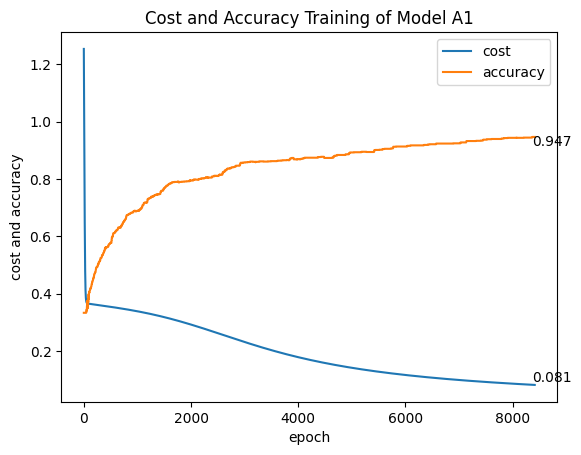

In [7]:
# plot the cost and accuracy in one graph
plt.plot(history_cost, label='cost')
plt.plot(history_acc, label='accuracy')
plt.text(len(history_cost) - 50, history_cost[-1] + 0.01, str(round(history_cost[-1], 3)))
plt.text(len(history_acc) - 50, history_acc[-1] - 0.03, str(round(history_acc[-1], 3)))
plt.xlabel('epoch')
plt.ylabel('cost and accuracy')
plt.title('Cost and Accuracy Training of Model ' + model_name)
plt.legend()

In [8]:
_, Z1, A1, Z2, A2 = myNN.forward(X_test_80_np_T)
predictions = np.argmax(A2, 0)

# calculate the accuracy
accuracy_test = np.mean(predictions == y_test_80)
print('Accuracy Testing of Model ' + model_name + ' :', accuracy_test)

# show in dataframe with prediction and actual value
import pandas as pd
df = pd.DataFrame({'prediction': predictions, 'actual': y_test_80})
print(df)

Accuracy Testing of Model A1 : 0.8471337579617835
     prediction  actual
0             0       0
1             1       1
2             0       0
3             0       0
4             2       2
..          ...     ...
309           1       1
310           0       0
311           0       0
312           0       0
313           1       1

[314 rows x 2 columns]


In [9]:
# save the model and the cost and accuracy
file_name = 'NeuralNetwork_Model_' + model_name + '.pkl'
file_name_cost_acc = 'Cost_Accuracy_Model_' + model_name + '.csv'
with open(file_name, 'wb') as f:
    pickle.dump(myNN, f)

# make cost and accuracy as dataframe
cost_acc = pd.DataFrame({'cost': history_cost, 'accuracy': history_acc})
cost_acc.to_csv(file_name_cost_acc, index=False)

# Results


In [8]:
import pandas as pd
# load the model
file_name = 'NeuralNetwork_Model_' + model_name + '.pkl'
file_name_cost_acc = '../../Dataset/Cost_Accuracy_Model_' + model_name + '.csv'
with open(file_name, 'rb') as f:
    myNN = pickle.load(f)

# load the cost and accuracy
cost_acc = pd.read_csv(file_name_cost_acc)

In [10]:
# make confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 80 : 20
conf_matrix = confusion_matrix(y_test_80, predictions)


Text(0.5, 1.0, 'Confusion Matrix of Model A1')

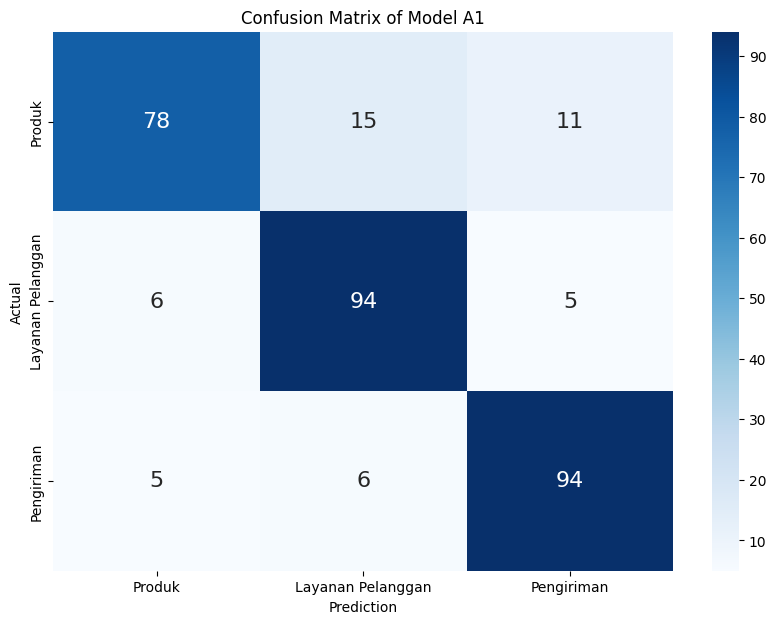

In [11]:
# plot the confusion matrix
import matplotlib.colors as mcolors

cat_code = {0: 'Produk', 1: 'Layanan Pelanggan', 2: 'Pengiriman'}

# 80 : 20
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=cat_code.values(), yticklabels=cat_code.values(), cmap="Blues",
            annot_kws={"size": 16})
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Model ' + model_name)




In [12]:
# calculate the precision, recall, and F1
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test_80, predictions, average=None)
recall = recall_score(y_test_80, predictions, average=None)
f1 = f1_score(y_test_80, predictions, average=None)


print('Accuracy  :', accuracy_test)
print('Precision :', precision)
print('Recall    :', recall)
print('F1        :', f1)



Accuracy  : 0.8471337579617835
Precision : [0.87640449 0.8173913  0.85454545]
Recall    : [0.75      0.8952381 0.8952381]
F1        : [0.80829016 0.85454545 0.8744186 ]


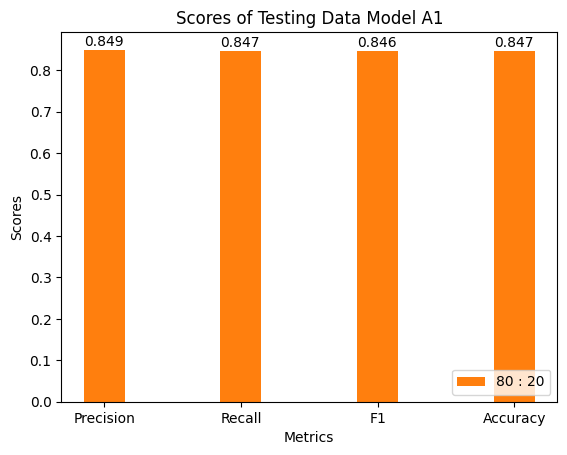

Scores of Testing Data Model A1
Precision  : 0.8494470844251011
Recall     : 0.8468253968253968
F1         : 0.8457514048790107
Accuracy   : 0.8471337579617835


In [13]:
# plot each precision, recall, and F1 in one graph


# 80 : 20
precision_avg = np.mean(precision)
recall_avg = np.mean(recall)
f1_avg = np.mean(f1)


fig, ax = plt.subplots()
index = np.arange(4)
bar_width = 0.3

rects2 = plt.bar(index + bar_width, [precision_avg, recall_avg, f1_avg, accuracy_test], bar_width,  color='C1', label='80 : 20')

# Add the exact numbers on top of each bar
for i, v in enumerate([precision_avg, recall_avg, f1_avg, accuracy_test]):
    plt.text(i + bar_width - 0.15, v + 0.01, str(round(v, 3)))

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Scores of Testing Data Model ' + model_name)
plt.xticks(index + bar_width, ('Precision', 'Recall', 'F1', 'Accuracy'))
plt.legend(loc='lower right')

plt.show()
print('Scores of Testing Data Model ' + model_name)
print('Precision  :', precision_avg)
print('Recall     :', recall_avg)
print('F1         :', f1_avg)
print('Accuracy   :', accuracy_test)

In [1]:
precision_avg = np.mean(precision)
recall_avg = np.mean(recall)
f1_avg = np.mean(f1)

#  make bar plot for each metrics
plt.bar(1, precision_avg, label='Precision')
plt.bar(2, recall_avg, label='Recall')
plt.bar(3, f1_avg, label='F1')
plt.bar(4, accuracy_test, label='Accuracy')

plt.xticks([1, 2, 3, 4], ['Precision', 'Recall', 'F1', 'Accuracy'])
plt.title('Scores of Testing Data Model ' + model_name)
plt.legend()
plt.show()
print('Scores of Testing Data Model ' + model_name)
print('Precision  :', precision_avg)
print('Recall     :', recall_avg)
print('F1         :', f1_avg)
print('Accuracy   :', accuracy_test) 

NameError: name 'np' is not defined